# Logistic Regression

**Author: [Kevin Broløs](https://abzu.ai/team)**

Builds on our linear regression from the earlier exercise, but evaluates with the sigmoid logistical function $\frac{1}{1+e^{-x}}$.

In [1]:
from sklearn.datasets import load_iris
from IPython.display import display, clear_output
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Load the Iris dataset from sklearn

In [2]:
iris=load_iris()

## Extract the data, target classes and features from the iris dataset

In [3]:
data, feature_names = iris.data, iris.feature_names
target, target_names = iris.target, iris.target_names

# The Iris dataset

The [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) consists of 150 samples equally distributed over three classes of the iris flower, namely 'Iris Setosa', 'Iris Versicolor' and 'Iris Virginica'.

The samples consist of four continunous features measured on real-world samples, as listed below:
1. Sepal Length (cm)
2. Sepal Width (cm)
3. Petal Length (cm)
4. Petal Width (cm)

For the non-botanically inclined - The petals are each individual leaf on the flower when in bloom. The sepals of the flower are the green leafy things by the foot of the flower near the stem protecting the flower petals.

In [4]:
def pairplot(data, feature_names, target_names):
    """
        data: a numpy array with the data
        feature_names: an array of the feature names for labelling
        target_names: an array of the target names for labelling
    """
    # Get the amount of features
    features = data.shape[1]
    
    # Get all the combinations of our features
    feature_combinations = [(f1, f2) for f1 in range(features) for f2 in range(features)]
    
    # Create a subplot with 1 row and as many columns as we have comparisons
    fig, axes = plt.subplots(nrows=features, ncols=features, figsize=(20,15))

    # Go through all the combinations and plot the two features against each other in one of the subplots
    for i, feature in enumerate(feature_combinations):
        # expand the (x, y) tuple to an x, y variable
        x, y = feature

        # Create a scatter plot in the i-th subplot (But scatter so the x axis follows columns and y axis rows)
        scatter = axes[y, x].scatter(data[:, x], data[:, y], c=target)
        
        # Set the labels on the x and y axis but only the first y-axes and last x-axes
        if y == features - 1:
            axes[y, x].set(xlabel=feature_names[x])
        if x == 0:
            axes[y, x].set(ylabel=feature_names[y])


    # A function to translate the target indices to string names for the color bar
    formatter = plt.FuncFormatter(lambda s, *args: target_names[s])
    
    # Add a legend for the colored dots so we can see which class is which
    fig.colorbar(scatter, ax=axes, ticks=[0, 1, 2], format=formatter)

    plt.show()

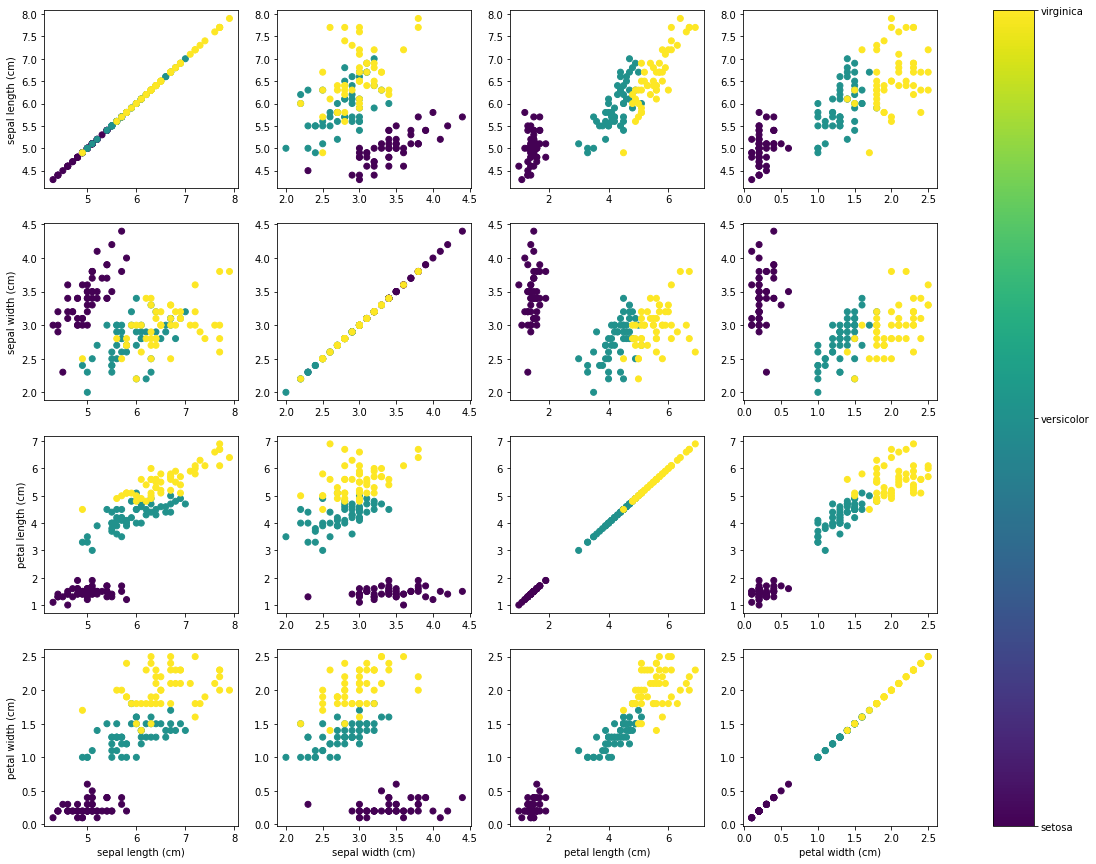

In [5]:
pairplot(data, feature_names, target_names)

Above is a quick scatterplot over the features so we can see how the data points are distributed amongst each other.

For more introduction on what to read from this, see [/Guides/01_Data_Analysis](Guides/01_Data_Analysis.ipynb)

# Binary classification

The logistic regression is by definition a binary classifier, and is easiest to understand as such.

So before we move on to how to use it as a multiclassifier, and do train/test splitting, let's just try it, pretending that we only have two classes. I'll choose versicolor and virginica, since they're more interesting.

We're just going to fit it and plot the same dataset as we have fitted on for this example

### Reducing the dataset to two classes

In [6]:
reduced_idx = np.where(target != 0)
red_x, red_y = data[reduced_idx], target[reduced_idx]

## Start by fitting on just one feature
### Mini exercise:
Try to change the feature_no to see how it fits different features

In [7]:
feature_no = 0
x = red_x[:, np.newaxis, feature_no]

In [8]:
LR = LogisticRegression(random_state=42)
LR.fit(x, red_y)

print(LR.intercept_, LR.coef_)

[-10.51734206] [[1.68321119]]


## Plotting the decision line

We can plot the decision line like we did in the [Linear Regression](01_EX_Linear_Regression.ipynb) notebook. Here, we'll see that it somewhat resembles the S-shaped sigmoid function. This is no accident, but it's been rounded for the prediction.

In [9]:
def plot_decision(x, y_pred, y_true, feature_name):
    fig = plt.figure(figsize=(10, 5))
    
    sorted_indices = np.argsort(x[:,0])
    plt.scatter(x[sorted_indices], y_true[sorted_indices])
    plt.plot(x[sorted_indices], y_pred[sorted_indices], color='orange')
    plt.xlabel(feature_name)
    
    plt.tight_layout()
    plt.show()

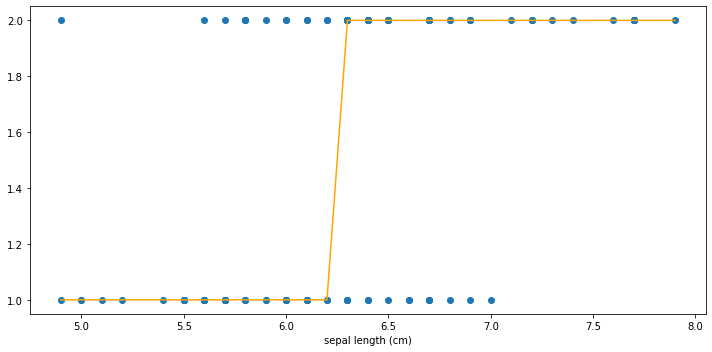

In [10]:
plot_decision(x, LR.predict(x), red_y, feature_names[feature_no])

# Multiclassification with Logistic Regression

Logistic regression does binary classification, but it has some different settings for dealing with multiple classes. We're using the "one-versus-rest" setting, which tries to classify it as "Target class/Not target class", for each of them.

This means it actually trains three logistic regressions like the one above for us, one with each class in focus, and the rest as "other", and then takes the model with the maximum probability output as the truth.

# Train/test split

Let's do the usual train/test split

For more introduction on dataset splitting, see [/Guides/05_Holdout_Validation](Guides/05_Holdout_Validation.ipynb)

In [11]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target, shuffle=True, test_size=0.5, stratify=target)

## Start by fitting on just one feature

### Mini exercise:
Try to change the feature_no to see how it fits different features

In [12]:
feature_no = 0
x = X_train[:, np.newaxis, feature_no]
x_t = X_test[:, np.newaxis, feature_no]

In [13]:
LR = LogisticRegression(random_state=42, multi_class='ovr')
LR.fit(x, y_train)

print(LR.intercept_, LR.coef_)

[ 15.8876727   -3.09211549 -11.45830978] [[-2.9263733 ]
 [ 0.40579691]
 [ 1.79208163]]


## Calculate the Accuracy of the testset

In [14]:
y_pred = LR.predict(x_t).T
generalization_error = np.sum(y_pred != y_test) / len(y_test)
print("Accuracy of the logistic regression on the test set: {:.2f}%".format(100 * (1 - generalization_error)))

Accuracy of the logistic regression on the test set: 69.33%


# Plot a confusion matrix

For more introduction to confusion matrices, check out [/Guides/04_Evaluation_and_Confusion_Matrices](Guides/04_Evaluation_and_Confusion_Matrices.ipynb)

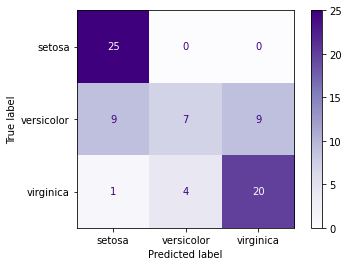

In [15]:
plot_confusion_matrix(LR, x_t, y_test, cmap=plt.cm.Purples, labels=np.unique(target), display_labels=target_names)
plt.show()

# Plotting the decision line

This makes a little less sense now, since it's no longer a linear function - and we're distributing it across multiple classes. But we can of course still do it, and see which classes it's struggling with.

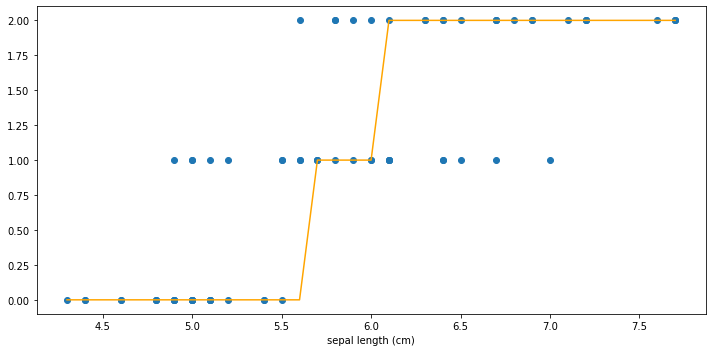

In [16]:
plot_decision(x_t, y_pred, y_test, feature_names[feature_no])

## Training the full train set

In [17]:
LR = LogisticRegression(random_state=42, multi_class='ovr')
LR.fit(X_train, y_train)

LR.coef_

array([[-0.50647784,  0.58420272, -1.96009742, -0.76108002],
       [ 0.19799195, -1.88183477,  0.58339279, -1.18703501],
       [-0.24707868, -0.08759653,  2.21676439,  1.94650845]])

## Looking at the coefficients

The coefficients for this are split for each class, but we can learn a lot from inspecting them!

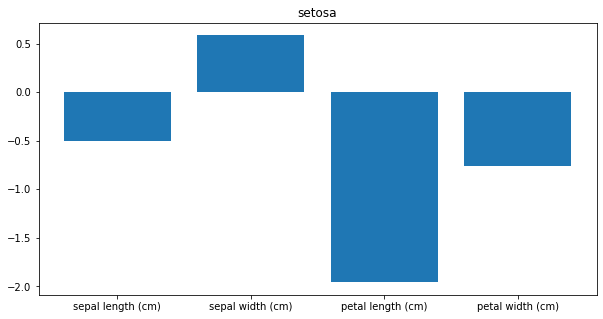

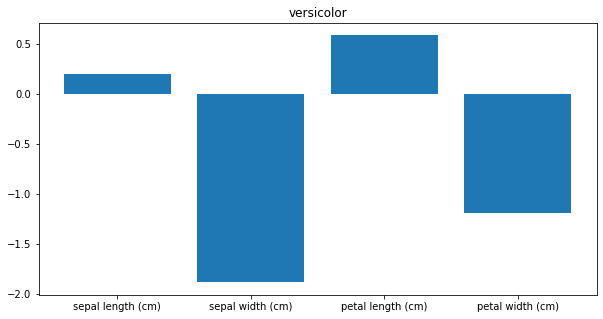

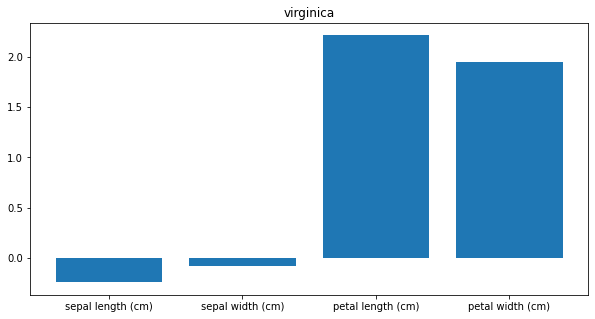

In [18]:
for i, t in enumerate(target_names):
    plt.figure(figsize=(10,5))
    plt.title(t)
    plt.bar(feature_names, LR.coef_[i])
    plt.show()

## Evaluating

Of course, we can use our trusty confusion matrix!

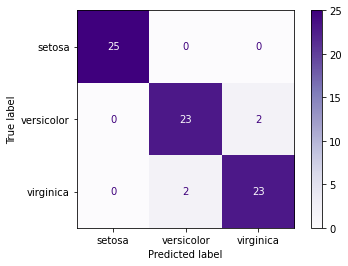

In [19]:
plot_confusion_matrix(LR, X_test, y_test, cmap=plt.cm.Purples, labels=np.unique(target), display_labels=target_names)
plt.show()

But we can also use our plots from the [Linear Regression](01_EX_Linear_Regression.ipynb) notebook, to see which samples it struggles with, on which dimensions. This obviously gets less feasible the more features we have.

In [20]:
def plot_target_match(y_pred, y_true, title=None):
    sorted_indices = np.argsort(y_true)
    x = np.arange(len(y_true))
    plt.scatter(x, y_true[sorted_indices], label='True')
    plt.plot(x, y_pred[sorted_indices], color='orange', label='Prediction')
    plt.title(title)
    plt.legend()

In [21]:
def plot_multi_regression(x, y_pred, y_true, feature_names):
    n_plots = x.shape[1]
    cols = 2
    n_rows = int(np.ceil(n_plots / 2))
    
    fig, axes = plt.subplots(nrows=n_rows, ncols = cols, figsize=(15, 15))
    
    for i in range(x.shape[1]):
        row = int(i/cols)
        col = i%cols
        
        sorted_indices = np.argsort(x[:,i])
        axes[row, col].scatter(x[sorted_indices, i], y_true[sorted_indices], label='True')
        axes[row, col].plot(x[sorted_indices, i], y_pred[sorted_indices], color='orange', label='Prediction')
        axes[row, col].set(xlabel=feature_names[i])
        axes[row, col].legend()
    
    plt.tight_layout()
    plt.show()

In [22]:
# Get prediction on the test set
y_pred = LR.predict(X_test)

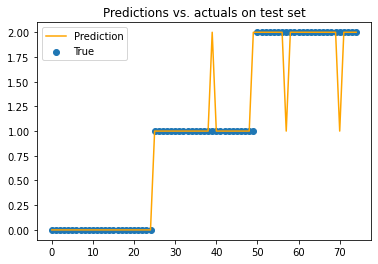

In [23]:
plot_target_match(y_pred, y_test, "Predictions vs. actuals on test set")

Let's see how it behaves among all the features

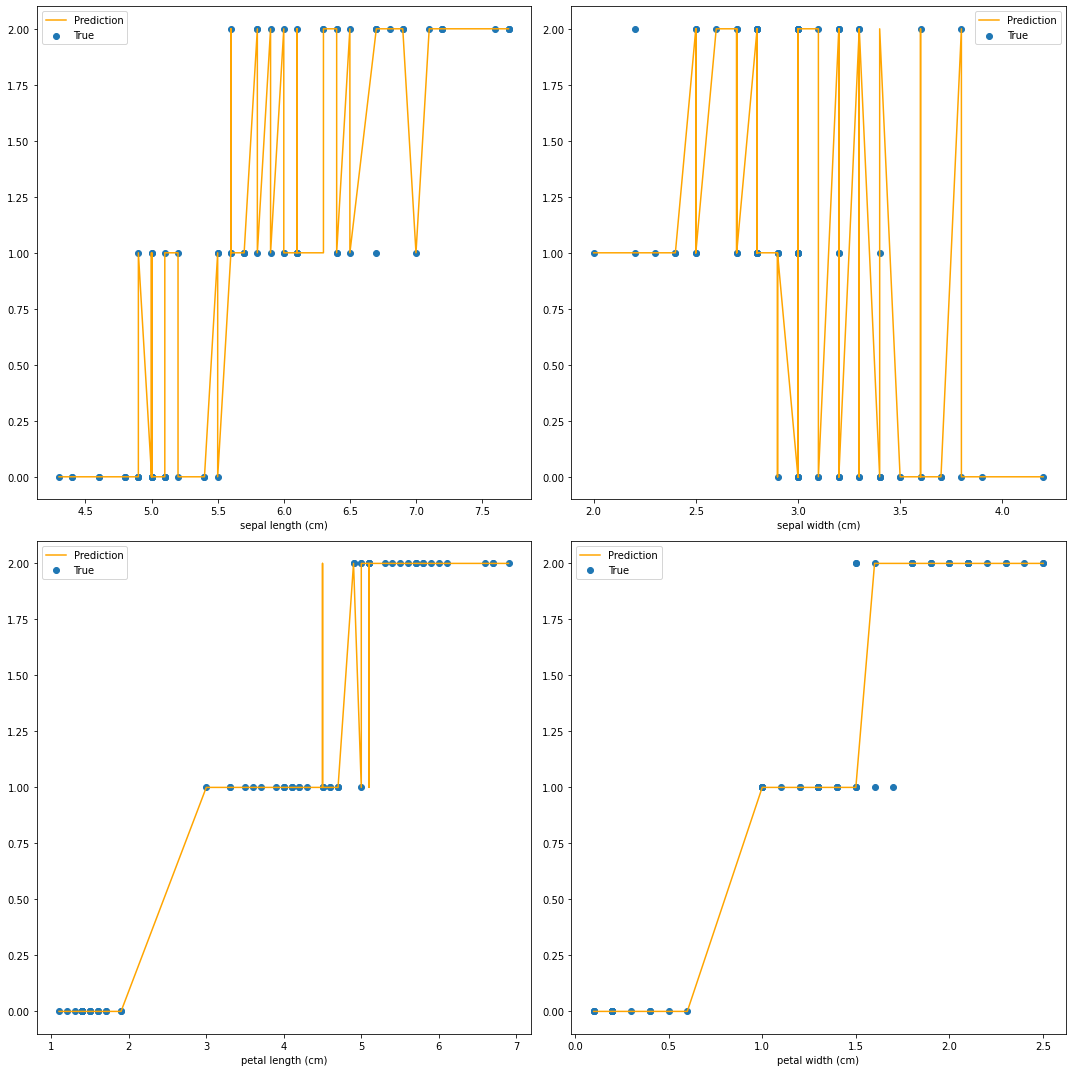

In [24]:
plot_multi_regression(X_test, y_pred, y_test, feature_names)